# Softmax函数

[详细说明](https://zhuanlan.zhihu.com/p/25723112)

$\Large{S_i = \frac{e^i}{\sum_{j}e^j} }$

i 表示第i个元素， i = 1....j

它将多个神经元的输出，映射到（0,1）区间内，可以看成概率来理解，从而来进行多分类！

二元分类就是只有一个概率为1，其它概率都是0



# 交叉熵损失函数


$\Large{Loss = -\sum_{i}y_ilna_i}$

其中y代表我们的真实值，a代表我们softmax求出的值。i代表的是输出结点的标号

其中$y_i = 1 $,那么形式变为$Loss = -lna_i$

<img src="img/softmax1.jpg" width="300px" height="300px" />

z4 = w41*o1+w42*o2+w43*o3

z5 = w51*o1+w52*o2+w53*o3

z6 = w61*o1+w62*o2+w63*o3

z4,z5,z6分别代表结点4,5,6的输出，01,02,03代表是结点1,2,3往后传的输入.

求导分析如下：

参数的形式在该例子中，总共分为w41,w42,w43,w51,w52,w53,w61,w62,w63.这些，那么比如我要求出w41,w42,w43的偏导，就需要将Loss函数求偏导传到结点4，然后再利用链式法则继续求导即可，举个例子此时求w41的偏导为:


$ \Large{\frac {\partial Loss}{\partial w41} 
= \frac {\partial Loss}{\partial a4} \cdot \frac {\partial a4}{\partial z4} \cdot \frac {\partial z4}{\partial w41} } 
= -\frac{1}{a4} \cdot  \frac {\partial a4}{\partial z4} \cdot o1
$

关键求出 $ \Large{\frac {\partial a4}{\partial z4}} $

w51.....w63等参数的偏导同理可以求出，那么我们的关键就在于Loss函数对于结点4,5,6的偏导怎么求，如下：

这里分为俩种情况：

if j = i

 $\Large{ 
 \frac {\partial a_j}{\partial z_i} 
 = \frac {\partial \frac{e^{z_j}}{\sum_{k}e^{z_k}} }{\partial z_i}  
 = \frac {(e^{z_j})' \cdot \sum_{k}e^{z_k} - e^{z_j} \cdot e^{z_j} }{(\sum_{k}e^{z_k})^2}
 =  \frac{e^{z_j}}{\sum_{k}e^{z_k}} -  \frac{e^{z_j}}{\sum_{k}e^{z_k}} \cdot  \frac{e^{z_j}}{\sum_{k}e^{z_k}}
 = a_j (1- a_j)
 }$
 
  $e^{z_i} $第i个的概率为1，由于 j = i ,  $e^{z_i} = e^{z_j} $
  
  
 $ \Large{\frac {\partial Loss}{\partial w_{i}} 
= -\frac{1}{a_{j}} \cdot  a_j (1- a_j) \cdot o_{i}
= (a_j - 1) \cdot o_{i}
}$

 if $ j \neq i$
 
  $\Large{ 
 \frac {\partial a_j}{\partial z_i} 
 = \frac {\partial \frac{e^{z_j}}{\sum_{k}e^{z_k}} }{\partial z_i}  
 = \frac {0 \cdot \sum_{k}e^{z_k} - e^{z_i} \cdot e^{z_j} }{(\sum_{k}e^{z_k})^2}
 =   -  \frac{e^{z_i}}{\sum_{k}e^{z_k}} \cdot  \frac{e^{z_j}}{\sum_{k}e^{z_k}}
 = -a_j a_i 
 }$
 
 $e^{z_j} 为常数，所以(e^{z_j})' = 0 $
 
 
  $ \Large{\frac {\partial Loss}{\partial w_{i}} 
= -\frac{1}{a_{j}} \cdot  -a_j a_i \cdot o_{i}
= a_i \cdot o_{i}
}$

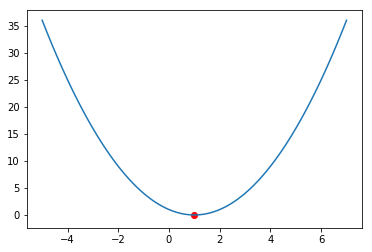

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x  *  x  - 2 * x + 1

def g(x):
    return 2 * x -2

def gd(x_start, step, g):   # gd代表了Gradient Descent
    x = x_start
    for i in range(20):
        grad = g(x)
        x -= grad * step
        print( '[ Epoch {0} ] grad = {1}, x = {2}'.format(i, grad, x))
        if abs(grad) < 1e-6:
            break;
    return x

x = np.linspace(-5,7,100)
y = f(x)
plt.plot(x,y)
plt.scatter(1,0,c='r')
plt.show()


In [29]:
gd(5,0.1,g)

[ Epoch 0 ] grad = 8, x = 4.2
[ Epoch 1 ] grad = 6.4, x = 3.56
[ Epoch 2 ] grad = 5.12, x = 3.048
[ Epoch 3 ] grad = 4.096, x = 2.6384
[ Epoch 4 ] grad = 3.2767999999999997, x = 2.31072
[ Epoch 5 ] grad = 2.6214399999999998, x = 2.0485759999999997
[ Epoch 6 ] grad = 2.0971519999999995, x = 1.8388607999999997
[ Epoch 7 ] grad = 1.6777215999999995, x = 1.6710886399999998
[ Epoch 8 ] grad = 1.3421772799999996, x = 1.536870912
[ Epoch 9 ] grad = 1.0737418239999998, x = 1.4294967295999998
[ Epoch 10 ] grad = 0.8589934591999997, x = 1.34359738368
[ Epoch 11 ] grad = 0.6871947673599998, x = 1.274877906944
[ Epoch 12 ] grad = 0.5497558138879999, x = 1.2199023255552
[ Epoch 13 ] grad = 0.4398046511103999, x = 1.17592186044416
[ Epoch 14 ] grad = 0.35184372088831983, x = 1.1407374883553278
[ Epoch 15 ] grad = 0.2814749767106557, x = 1.1125899906842622
[ Epoch 16 ] grad = 0.22517998136852446, x = 1.0900719925474098
[ Epoch 17 ] grad = 0.18014398509481966, x = 1.0720575940379278
[ Epoch 18 ] grad 

1.0461168601842739